<div align="center">
  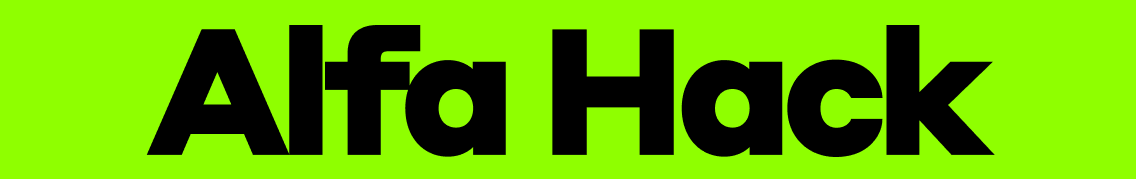
</div>

## Этап 1. Установка библиотек и импорт данных

In [1]:
# # Cкачиваем необходимые библиотеки для работы
# !pip install category_encoders

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import glob
import os
import zipfile
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.callbacks import ReduceLROnPlateau
import random
from sklearn.base import BaseEstimator, TransformerMixin
pd.set_option('display.max_columns', None)

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 3"_, то необходимо поменять путь к директории и ссылки ниже

In [4]:
# Путь к папке с тренировочными данными
path_train = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/train'
# Путь к папке с тестовыми данными
path_test = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/test'

Получим список файлов в каждой из папок с данными

In [5]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_1.csv', 'train_10.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv', 'train_6.csv', 'train_7.csv', 'train_8.csv', 'train_9.csv']
Список файлов в репозитории test: ['test_1.csv', 'test_10.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv', 'test_6.csv', 'test_7.csv', 'test_8.csv', 'test_9.csv']


Объединим тренировочные и тестовые данные в единые датасеты train и test

In [6]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строки и {} столбцов'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 413194 строки и 189 столбцов'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,0,train,330552,-1.156815,-0.355036,1.488198,0.179687,-0.058664,-1.449906,2.0,1.594023,-0.053979,1.551164,-0.257320,1.461183,-0.861911,-0.782477,0.126824,1.009032,-0.319149,-1.277516,-0.042569,0.356824,0.087288,1.177792,1.051416,0.143168,-0.501590,0.665521,-0.342118,-0.353315,-0.820528,0.776332,2.0,0.091260,0.433704,0.872973,-0.376047,0.797912,-0.762517,0.247621,0.066990,-0.882952,-1.211057,0.145034,0.567099,-1.226269,0.529146,-1.604576,-0.729640,-0.724871,1.613753,0.142277,-1.352442,-0.324309,-1.027708,0.630245,-0.664938,-0.779780,-1.167344,1.095431,-0.122194,1.0,1.0,-0.182173,0.783091,0.727862,-2.508540,-0.385985,0.883156,-2.151894,-0.310570,-0.349265,1.0,0.118937,-0.528562,0.121701,-1.118756,0.609308,0.595703,-0.005446,-0.753025,-0.504923,0.099100,0.193000,0.226857,-0.722800,0.663775,-1.498443,-0.006676,0.072573,0.462641,-0.922699,-0.528744,-1.272010,-0.284838,-0.820173,0.918777,-0.742127,-1.435519,0.463226,-1.550296,0.388277,-1.693734,1.638272,0.100640,-0.562557,-1.686937,-1.684289,0.031568,-1.037757,1.0,0.842597,-1.008186,0.274966,-0.362430,1.975927,-0.038556,0.698838,-0.839852,-1.363331,-1.955300,-0.541670,-1.923977,2.0,-1.230810,-0.210838,2.580953,-0.318721,1.021760,-0.873478,-1.243553,0.720291,-1.923682,1.217041,1.090452,-0.783085,-0.278743,-0.640574,0.393149,0.228991,0.789575,-0.761249,0.535461,-0.417707,1.234578,0.304258,-1.816376,-0.298904,0.632327,-0.751493,0.404310,0.612138,0.441682,-0.312262,-0.372049,0.116148,-1.464543,1.0,-1.103558,1.145356,-0.339026,-0.484085,0.446411,0.396192,2.0,-1.330357,-0.134486,-0.687339,2.0,-1.178632,-1.920956,1.230120,-1.205322,0.596424,-1.156520,-1.016261,-0.666022,0.298106,-0.706344,-0.464366,9.0,0.111611,-1.945707,1.060280,0.256524,0.560978,2.0,-0.308126
1,0,train,330553,-1.568632,2.310096,1.808091,0.918415,2.878064,1.565944,34.0,1.107400,1.898680,0.348884,1.646200,1.611579,-2.582339

,count
smpl,
train,413194


In [7]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
data_test['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 171919 строк и 188 столбцов'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,test,499149,0.048151,0.824615,-2.192327,0.213289,-0.768522,-0.700286,2.0,-0.968280,-0.111370,0.637587,0.346057,0.277382,-1.019648,1.391394,1.754455,-0.189695,-0.249906,-1.039629,0.668826,-0.814856,0.866321,0.991403,0.849782,-0.004606,0.197830,-0.413422,-0.358548,-0.187167,0.026851,-0.488292,2.0,0.392513,-1.175732,0.848383,-0.257677,0.266352,-2.135177,1.000207,-0.288275,0.292825,0.454806,1.257515,-0.391448,0.510949,0.312208,-2.339528,-1.099029,1.114711,-0.252962,-0.701190,0.653425,-1.354552,0.049306,-0.734829,0.262950,0.985382,-3.025224,-1.694694,0.465870,1.0,1.0,1.139143,0.774675,-0.336277,-0.843166,-0.553815,-1.492425,1.754226,-0.392583,1.288073,0.0,0.182713,-1.514689,0.486312,0.361092,0.379679,-0.069550,1.210932,1.800425,-0.476344,0.683842,0.048383,0.163340,0.321303,0.383017,-0.600796,0.357537,1.557646,0.305595,0.640394,-0.438798,1.374997,-1.621151,0.187835,-0.306934,-0.504294,-0.088521,0.803261,0.077233,-0.356179,0.372340,0.885551,0.232756,-1.058338,0.567046,-1.592645,0.101233,0.357399,1.0,0.844319,-0.418842,-0.774681,-0.450316,-1.332933,-1.000951,-0.303890,1.054889,-0.654749,-0.037222,-1.600767,1.468290,2.0,0.307770,0.365905,1.292335,0.331719,-0.100261,-0.063090,2.206298,0.998839,-0.380047,-0.212988,0.288292,0.185188,0.926377,-0.762060,0.011765,-2.429851,2.358813,-0.054521,-0.678684,0.645278,-0.044393,-1.861348,-0.375058,0.473148,-0.760544,-1.059550,1.179523,0.710908,0.233940,-1.738815,-0.823061,0.769935,0.659201,1.0,0.415778,0.783475,-1.567504,-0.776120,0.369236,-0.760733,2.0,-0.884992,-0.061916,-0.056258,2.0,-0.450898,-0.071944,-0.692380,-0.277019,0.760824,0.639766,0.363222,0.877857,0.980769,-0.309041,0.285278,9.0,0.819193,-0.112794,-0.900505,0.562457,1.885660,2.0,0.653493
1,test,499150,0.006023,-0.176324,-2.702606,-1.145303,0.064057,-0.128773,2.0,0.860384,0.379111,0.365856,0.477849,0.635353,0.488506,0.085624,2.083037,0.228740,

,count
smpl,
test,171919


## Этап 2. Работа с моделью

In [8]:
# Выделим признаки для обучения и искомый признак в датасете train
# для обучения модели
X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# # Обучим модель на тренировочной части тренировочных данных
# gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=3,
#                                           max_depth=20,
#                                           max_iter=125,
#                                           random_state=42).fit(X_train, y_train)

# # Получим предсказание с вероятностями для валидационной части тренировочного датасета
# y_pred = gbdt_clf.predict_proba(X_test)

# # Переведем предсказание в формат Series
# y_pred = pd.Series(y_pred[:, 1])

# # Высчитаем метрику roc-auc по валидационным данным
# print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

## Этап 3. Предсказание для тестовых данных

Получим предсказание на тестовых данных

In [9]:
# Обучим модель на полных тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X, y)

# Для предсказания используем тестовый датасет с исключенным признаком smpl
y_test_pred = gbdt_clf.predict_proba(data_test.drop(['smpl'], axis=1))

# Переведем предсказание в формат Series
y_test_pred = pd.Series(y_test_pred[:, 1])

# Добавим данные предсказания к датасету
data_test['target'] = y_test_pred

# Сохраним итоговые данные об id и предсказаниях в формате csv
data_test[['id', 'target']].to_csv('baseline_submission_case3.csv', index=False)

KeyboardInterrupt: 

Baseline создан компанией Changellenge >> - ведущей организацией по кейсам в России, для хакатона Alfa Hack.  

Запрещено распространение данного файла, файлов данных в форматах csv, а также текста кейса без письменного разрешения владельца авторских прав в лице компании Changellenge>>.

## **Data preprocessing**
Проверим данные на пропуски

In [10]:
data_train.isna().sum().sum()

0

#### **Обработка категориальных и числовых признаков**

In [ ]:
correlation_matrix = X.corr().abs()
high_corr_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i, j] > 0.7:
            feature_1 = correlation_matrix.index[i]
            feature_2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature_1, feature_2))

# Создание новых признаков
for feature_1, feature_2 in high_corr_pairs:
    # Добавляем новые признаки в X_combined
    X[f"{feature_1}_div_{feature_2}"] = X[feature_1] / X[feature_2].replace(0, 1e-10)  # Деление, избегая деления на ноль
    X[f"{feature_2}_div_{feature_1}"] = X[feature_2] / X[feature_1].replace(0, 1e-10)  # Обратное деление
    X[f"{feature_1}_mul_{feature_2}"] = X[feature_1] * X[feature_2]  # Умножение

In [12]:
X.isna().sum().sum()

0

In [41]:
assume_cat = [f'feature_{num_feature}' for num_feature in [7, 31, 60, 61, 71, 109, 122, 156, 163, 167, 179]]
for feature in assume_cat:
    unique_values = X[feature].unique()
    print(f"{feature}: {sorted(unique_values)}")

categorical_features = ['feature_31', 'feature_60', 'feature_61', 'feature_71', 'feature_122', 'feature_156', 'feature_167']
for feature in categorical_features:
    X[feature] = X[feature].astype('category')  # Объявили категориальными
numerical_features = [col for col in X.columns if col not in categorical_features]

feature_7: [0.0, 0.6931471805599453, 1.0986122886681098, 1.3862943611198906, 1.6094379124341003, 1.791759469228055, 1.9459101490553132, 2.0794415416798357, 2.1972245773362196, 2.302585092994046, 2.3978952727983707, 2.4849066497880004, 2.5649493574615367, 2.6390573296152584, 2.70805020110221, 2.772588722239781, 2.833213344056216, 2.8903717578961645, 2.9444389791664403, 2.995732273553991, 3.044522437723423, 3.091042453358316, 3.1354942159291497, 3.1780538303479458, 3.2188758248682006, 3.258096538021482, 3.295836866004329, 3.332204510175204, 3.367295829986474, 3.4011973816621555, 3.4339872044851463, 3.4657359027997265, 3.4965075614664802, 3.5263605246161616, 3.5553480614894135, 3.58351893845611, 3.6109179126442243, 3.6375861597263857, 3.6635616461296463, 3.6888794541139363, 3.713572066704308, 3.7376696182833684, 3.7612001156935624, 3.784189633918261, 3.8066624897703196, 3.828641396489095, 3.8501476017100584, 3.871201010907891, 3.8918202981106265, 3.912023005428146, 3.9318256327243257, 3.9

In [56]:
for column in numerical_features:
    skewness = X[column].skew()  # Вычисляем асимметрию (скошенность)
    if ((X[column] > 0)).all() and skewness > 1:
        X[column] = np.log(X[column].replace(0, 1e-10))
    elif ((X[column] >= 0)).all() and 0.5 <= skewness <= 1: #  & (len(column) <= 13)
        X[column] = np.sqrt(X[column])
    elif ((X[column] >= 0)).all() and -1 <= skewness <= -0.5:
        X[column] = X[column] ** 2

In [27]:
# mutual_info = mutual_info_classif(X, y)
# with open('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/mut_info_new.pkl', 'wb') as file:
#     pickle.dump(mutual_info, file)

In [29]:
with open('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/mut_info_new.pkl', 'rb') as file:
    mutual_info = pickle.load(file)

<Axes: >

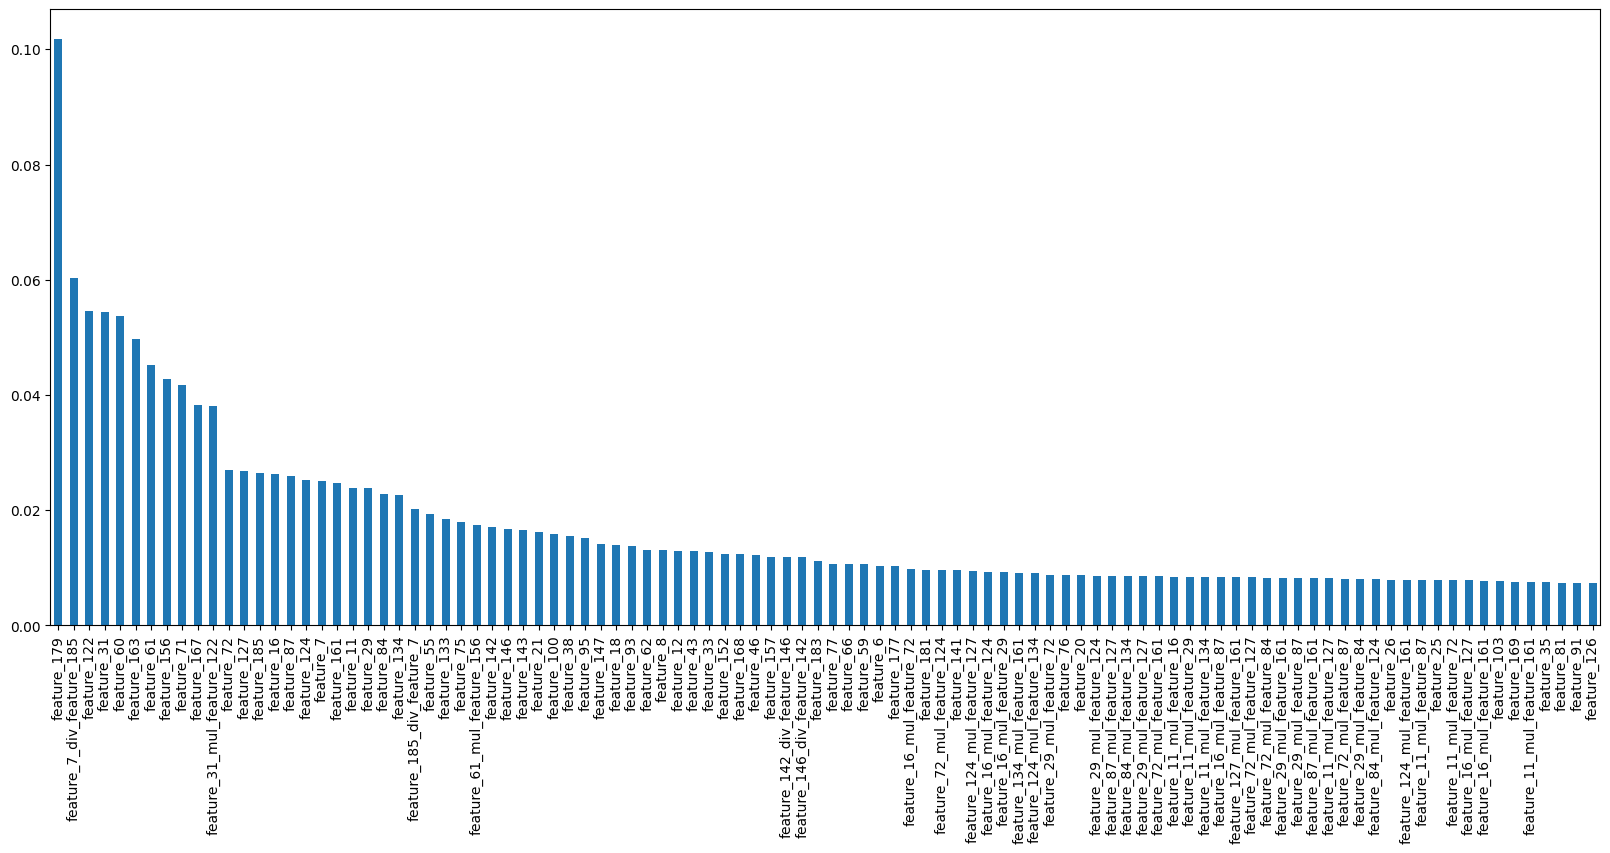

In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)[:100].plot.bar(figsize=(20, 8))

In [59]:
top_100_features = mutual_info.sort_values(ascending=False)[:100].index
exclude = ["feature_185_div_feature_7", "feature_146_div_feature_142"]
X_combined_1 = X[top_100_features.difference(exclude)]

In [60]:
skewness = X_combined_1.select_dtypes(include=['number']).skew()
skewness[abs(skewness) > 1]

,0
feature_11_mul_feature_127,2.387812
feature_11_mul_feature_134,2.485451
feature_11_mul_feature_16,2.248822
feature_11_mul_feature_161,3.640014
feature_11_mul_feature_29,2.494212
feature_11_mul_feature_72,2.346042
feature_11_mul_feature_87,2.383716
feature_124_mul_feature_127,1.922519
feature_124_mul_feature_134,2.290936
feature_124_mul_feature_161,2.354108


In [ ]:
for feature in top_100_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_combined_1[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_1, y, random_state=42, stratify=y, test_size=0.3)

# Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=3,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred = gbdt_clf.predict_proba(X_test)

# Переведем предсказание в формат Series
y_pred = pd.Series(y_pred[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:400: FutureWarning: The categorical_features parameter will change to 'from_dtype' in v1.6. The 'from_dtype' option automatically treats categorical dtypes in a DataFrame as categorical features.
  warnings.warn(


Метрика roc-auc на валидационных данных имеет значение: 0.8025608074184027


# **НИЖЕ СТАРЫЙ КОД**

Теперь хорошо бы из большого числа признаков извлечь нужные нам признаки. Определить это можно несколькими способами. Наша целевая переменная бинарная, часть признаков числовые, часть категориальные.
7, 31, 60, 61, 71, 109, 122, 156, 163, 167, 179, 185 признаки предположительно категориальные, потому что принимают целые значения.

Проверим, какие значения они принимают

In [11]:
assume_cat = [f'feature_{num_feature}' for num_feature in [7, 31, 60, 61, 71, 109, 122, 156, 163, 167, 179]]
for feature in assume_cat:
    unique_values = data_train[feature].unique()
    print(f"{feature}: {sorted(unique_values)}")

feature_7: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0]
feature_31: [0.0, 1.0, 2.0, 3.0, 4.0]
feature_60: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
feature_61: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
feature_71: [0.0, 1.0, 2.0]
feature_109: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
feature_122: [0.0, 1.0, 2.0, 3.0, 4.0]
feature_156: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
feature_163: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
feature_167: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
feature_179: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]


Из уникальных значений по соответствующим переменным видно, что feature 31, 61, 71, 109, 122, 156, 167, вероятнее всего, категориальные, для кодировки будем использовать one-hot encoding. Переменные же 7, 60, 163, 179 тоже категориальные, но кодирование для них нужно будет оставить Label_Encoding. Превратим категориальные переменные в тип "категориальный".

In [19]:
# categorical_features = ['feature_7', 'feature_31', 'feature_60', 'feature_61', 'feature_71', 'feature_109', 'feature_122', 'feature_156', 'feature_163', 'feature_167', 'feature_179']
# for feature in categorical_features:
#     data_train[feature] = data_train[feature].astype('category')  # Объявили категориальными

# numerical_features = [col for col in X.columns if col not in categorical_features]
# low_cardinality_features = ['feature_31', 'feature_61', 'feature_71', 'feature_109', 'feature_122', 'feature_156', 'feature_167']

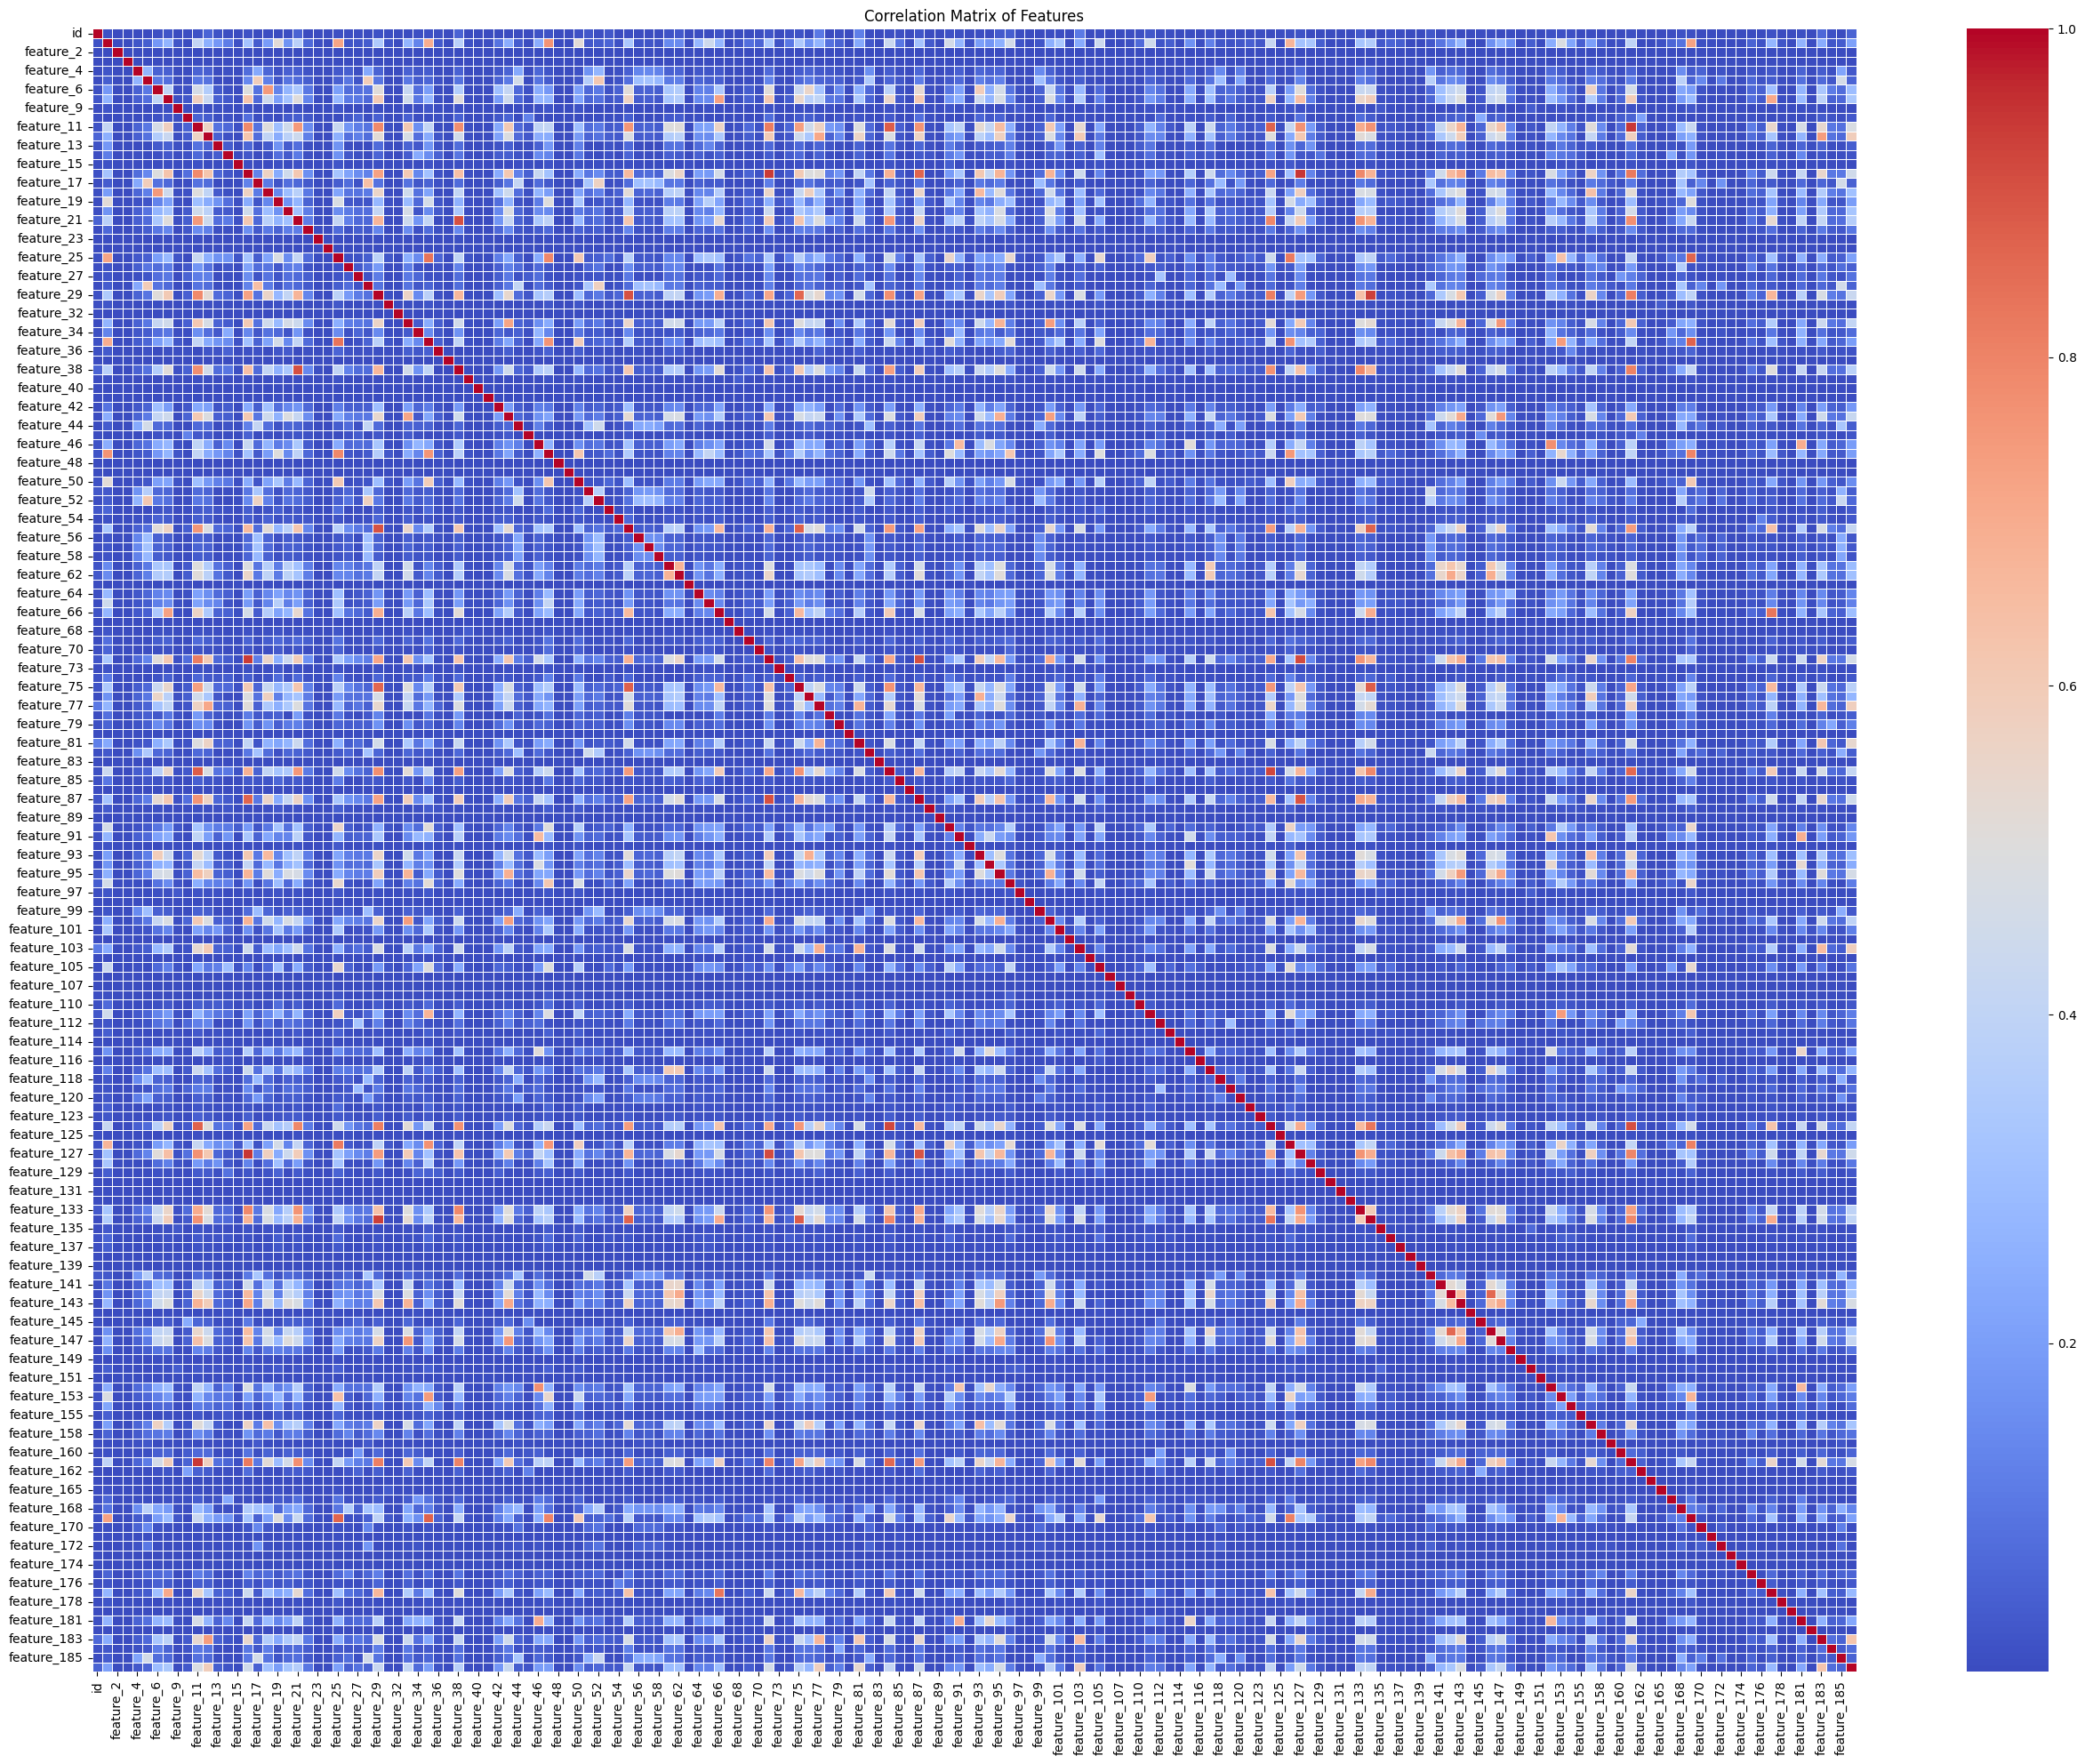

## **Feature selection and feature engeneering**

In [13]:
# Запустить один раз, чтобы сохранить файл себе на диск и не загружать каждый раз
# mutual_info = mutual_info_classif(data_train.drop(['target', 'id', 'smpl'], axis=1), y)
# with open('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/mutual_info.pkl', 'wb') as file:
#     pickle.dump(mutual_info, file)

In [14]:
with open('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/mutual_info.pkl', 'rb') as file:
    mutual_info = pickle.load(file)

<Axes: >

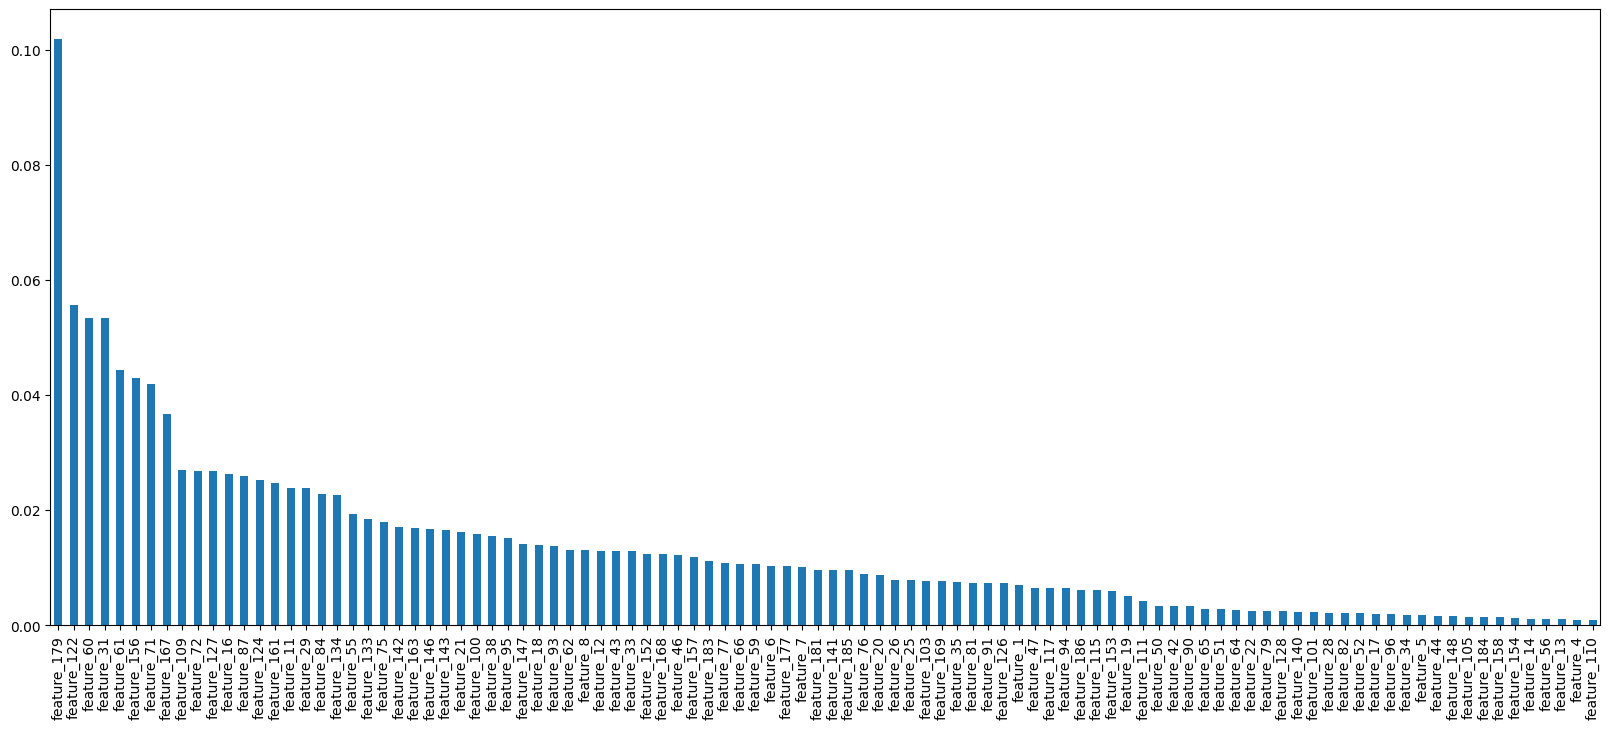

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = data_train.drop(['target', 'id', 'smpl'], axis=1).columns
mutual_info.sort_values(ascending=False)[:100].plot.bar(figsize=(20, 8))

Теперь сделаем новый датасет без статистически незначимых переменных, которые грузят нашу модель.

In [16]:
X_combined = data_train[mutual_info.sort_values(ascending=False)[:69].index]
# Можно попробовать выбрать 69 лучших признаков, 41, 29, 18, 8, 4, 1

In [17]:
numerical_features = X_combined.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_combined.select_dtypes(include=['category']).columns

In [ ]:
correlation_matrix = X_combined[numerical_features].corr().abs()
# plt.figure(figsize=(32, 24))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title("Correlation Matrix of Features")
# plt.show()

In [ ]:
high_corr_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i, j] > 0.7:
            feature_1 = correlation_matrix.index[i]
            feature_2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature_1, feature_2))

# Создание новых признаков
for feature_1, feature_2 in high_corr_pairs:
    # Добавляем новые признаки в X_combined
    X_combined[f"{feature_1}_div_{feature_2}"] = X_combined[feature_1] / X_combined[feature_2].replace(0, np.nan)  # Деление, избегая деления на ноль
    X_combined[f"{feature_2}_div_{feature_1}"] = X_combined[feature_2] / X_combined[feature_1].replace(0, np.nan)  # Обратное деление
    X_combined[f"{feature_1}_mul_{feature_2}"] = X_combined[feature_1] * X_combined[feature_2]  # Умножение

Вновь применим mutual_info, чтобы выяснить важность признаков с учетом созданных отношений и произведений

In [20]:
# mutual_info = mutual_info_classif(X_combined, y)
# with open('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/mutual_info_after_feature_engineering.pkl', 'wb') as file:
#     pickle.dump(mutual_info, file)

<Axes: >

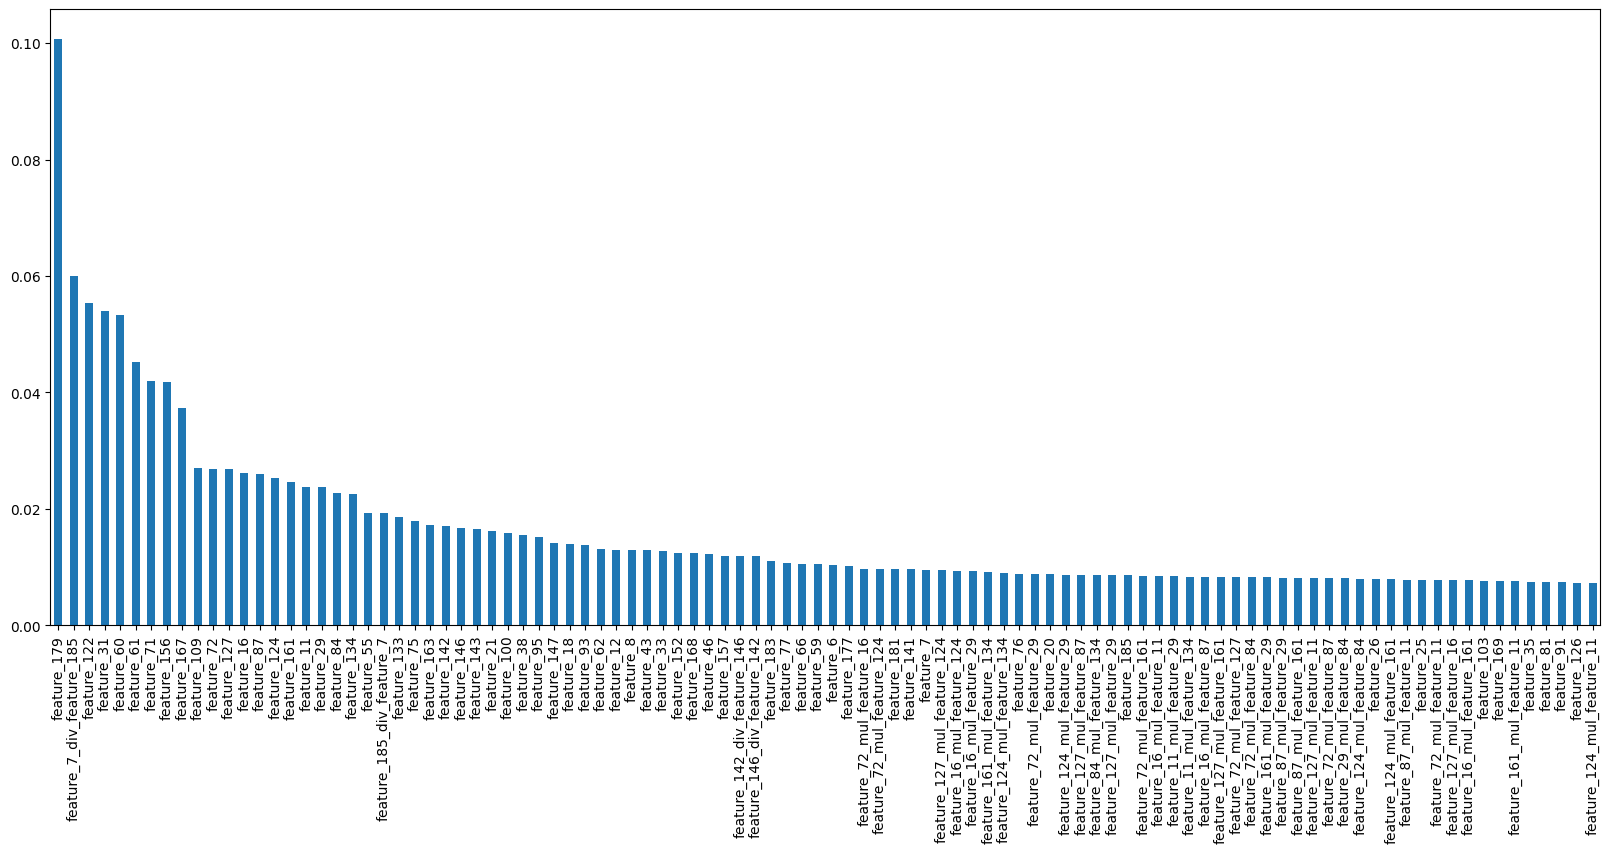

In [21]:
with open('/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/mutual_info_after_feature_engineering.pkl', 'rb') as file:
    mutual_info = pickle.load(file)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_combined.columns
mutual_info.sort_values(ascending=False)[:100].plot.bar(figsize=(20, 8))

In [22]:
top_100_features = mutual_info.sort_values(ascending=False)[:130].index
X_combined_1 = X_combined[top_100_features]

## **Choosing Model**

In [70]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
import tensorflow as tf

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_combined_1, data_train['target'], stratify=data_train['target'], test_size=0.3, random_state=42)

# Определяем числовые и категориальные признаки
numerical_features = X_combined_1.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_combined_1.select_dtypes(include=['category']).columns

# Создаем пайплайн для числовых признаков: сначала Йео-Джонсон для уменьшения асимметрии, затем стандартизация
numerical_pipeline = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),  # Преобразование Йео-Джонсона
    ('scaler', StandardScaler())  # Нормализация
])

# Создаем ColumnTransformer, включающий пайплайн для числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),  # Пайплайн для числовых признаков
        # ('cat', OneHotEncoder(), categorical_features)  # One-Hot Encoding для категориальных признаков
    ],
    remainder='passthrough'
)

# Преобразуем обучающую и тестовую выборки
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Создаем tf.data.Dataset из преобразованных данных
train_ds = tf.data.Dataset.from_tensor_slices((X_train_transformed, y_train)).batch(512)
valid_ds = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test)).batch(512)

# Параметры нейронной сети
input_dim = X_train_transformed.shape[1]  # Количество признаков после преобразования
inputs = keras.Input(shape=(input_dim,))
x = keras.layers.Dense(32)(inputs)
x = keras.layers.BatchNormalization()(x)  # Batch Normalization перед активацией
x = keras.activations.leaky_relu(x)
x = keras.layers.Dropout(0.3)(x)  # Dropout для регуляризации
x_dense = keras.layers.Dense(16)(x)
x = keras.layers.concatenate([inputs, x_dense])
x = keras.layers.BatchNormalization()(x)  # Batch Normalization после конкатенации
x = keras.activations.leaky_relu(x)
x = keras.layers.Dense(1, activation="sigmoid")(x)  # Выходной слой для бинарной классификации

model = keras.Model(inputs=inputs, outputs=x)

# Callback для уменьшения скорости обучения
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.36854,
    patience=2,
    verbose=2,
    mode="auto",
    min_delta=0.002,
    cooldown=0,
    min_lr=0.00000125
)

# Компиляция модели
model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.AUC()],
)

# Обучение модели
model.fit(train_ds, validation_data=valid_ds, epochs=20, callbacks=[reduce_lr])

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - auc_2: 0.7504 - loss: 0.2176 - val_auc_2: 0.7925 - val_loss: 0.1917 - learning_rate: 0.0100
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - auc_2: 0.7907 - loss: 0.1933 - val_auc_2: 0.7957 - val_loss: 0.1908 - learning_rate: 0.0100
Epoch 3/20
563/565 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc_2: 0.7942 - loss: 0.1923
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.003685399917624891.
565/565 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - auc_2: 0.7942 - loss: 0.1923 - val_auc_2: 0.7979 - val_loss: 0.1904 - learning_rate: 0.0100
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - auc_2: 0.7977 - loss: 0.1913 - val_auc_2: 0.8006 - val_loss: 0.1897 - learning_rate: 0.0037
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - auc_2: 0.7993 - loss: 0.1909 - val_auc_2: 0.8015 - val_loss: 0.1897 - learning_rate: 0.0037
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - auc_2: 0.8004 - loss: 0.1906 - val_auc_2: 0.8013 - val_loss: 0.1896 

In [83]:
X_transformed = X_train[numerical_features].copy()

# Применяем преобразование Йео-Джонсона
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pd.DataFrame(pt.fit_transform(X_transformed), columns=numerical_features)

# Вычисляем асимметрию для каждого признака после преобразования
skewness_after = X_transformed.skew()
print("Асимметрия после преобразования Йео-Джонсона:")
skewness_after[abs(skewness_after) > 1]

Асимметрия после преобразования Йео-Джонсона:


,0
feature_11_mul_feature_127,-1.365355
feature_11_mul_feature_134,-1.232419
feature_11_mul_feature_16,-1.520654
feature_11_mul_feature_161,-1.673757
feature_127_mul_feature_161,-1.318167
feature_134_mul_feature_161,-1.115777
feature_142_div_feature_146,41.768039
feature_16_mul_feature_127,-2.015567
feature_16_mul_feature_72,-1.711347
feature_179,5.037123


## **Generative algorithm**

In [64]:
def fitness_function(weights, model, valid_ds):
    model.set_weights(weights)
    loss, auc = model.evaluate(valid_ds, verbose=0)
    return auc

def create_initial_population(model, population_size):
    population = []
    initial_weights = model.get_weights()  # Получаем текущие веса модели как шаблон
    for _ in range(population_size):
        individual = [w + np.random.normal(0, 0.1, w.shape) for w in initial_weights]
        population.append(individual)
    return population

def selection(population, fitnesses, k=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), k)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

def crossover(parent1, parent2):
    child1, child2 = [], []
    for w1, w2 in zip(parent1, parent2):
        alpha = random.random()
        child1.append(alpha * w1 + (1 - alpha) * w2)
        child2.append(alpha * w2 + (1 - alpha) * w1)
    return child1, child2


def mutation(individual, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = individual[i] + np.random.normal(0, 0.1, individual[i].shape)
    return individual


def genetic_algorithm(model, population_size, generations, mutation_rate, valid_ds):
    # Создаем начальную популяцию
    population = create_initial_population(model, population_size)

    for generation in range(generations):
        # Оцениваем каждого индивида
        fitnesses = [fitness_function(ind, model, valid_ds) for ind in population]

        # Сохраняем лучшего индивида поколения
        best_individual = max(population, key=lambda ind: fitness_function(ind, model, valid_ds))
        best_fitness = fitness_function(best_individual, model, valid_ds)
        print(f"Generation {generation + 1}, Best AUC: {best_fitness:.4f}")

        # Селекция
        selected_population = selection(population, fitnesses)

        # Кроссовер и мутация для создания следующего поколения
        next_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1 if i + 1 < len(selected_population) else 0]

            child1, child2 = crossover(parent1, parent2)
            next_population.append(mutation(child1, mutation_rate))
            next_population.append(mutation(child2, mutation_rate))

        # Обновляем популяцию
        next_population[0] = best_individual  # Сохраняем лучшего индивида
        population = next_population

    # Возвращаем лучший найденный набор весов
    return best_individual

In [69]:
best_weights = genetic_algorithm(model, population_size=30, generations=30, mutation_rate=0.02, valid_ds=train_ds)
model.set_weights(best_weights)
loss, auc = model.evaluate(valid_ds)
print(f"Final AUC with optimized weights: {auc:.4f}")

Generation 1, Best AUC: 0.7981
Generation 2, Best AUC: 0.8003
Generation 3, Best AUC: 0.8021
Generation 4, Best AUC: 0.8025
Generation 5, Best AUC: 0.8034
Generation 6, Best AUC: 0.8034
Generation 7, Best AUC: 0.8034
Generation 8, Best AUC: 0.8042
Generation 9, Best AUC: 0.8042
Generation 10, Best AUC: 0.8042
Generation 11, Best AUC: 0.8043
Generation 12, Best AUC: 0.8043
Generation 13, Best AUC: 0.8045
Generation 14, Best AUC: 0.8046
Generation 15, Best AUC: 0.8047
Generation 16, Best AUC: 0.8047
Generation 17, Best AUC: 0.8048
Generation 18, Best AUC: 0.8049
Generation 19, Best AUC: 0.8049
Generation 20, Best AUC: 0.8049
Generation 21, Best AUC: 0.8049
Generation 22, Best AUC: 0.8049
Generation 23, Best AUC: 0.8050
Generation 24, Best AUC: 0.8050
Generation 25, Best AUC: 0.8050
Generation 26, Best AUC: 0.8050
Generation 27, Best AUC: 0.8050
Generation 28, Best AUC: 0.8050
Generation 29, Best AUC: 0.8050
Generation 30, Best AUC: 0.8050
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc_1:

0.7697 population_size=50, generations=10, mutation_rate=0.1

0.7735 population_size=50, generations=10, mutation_rate=0.02

0.7750 population_size=20, generations=10, mutation_rate=0.0

alpha: 0.2, lambda: 0.5, subsample: 1.0, colsample_bytree: 1.0, colsample_bynode: 0.5, colsample_bylevel: 0.5 => ROC-AUC: 0.8070

alpha: 0.9, lambda: 0.0, subsample: 1.0, colsample_bytree: 1.0, colsample_bynode: 0.5, colsample_bylevel: 0.5 => ROC-AUC: 0.8069

In [63]:
numerical_features = X_combined_1.select_dtypes(include=['float64', 'int64']).columns
X_train, X_test, y_train, y_test = train_test_split(X_combined_1, data_train['target'], stratify=y, test_size=0.3, random_state=42)

# Нормализация
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Нормализация числовых признаков
        # ('cat', OneHotEncoder(), categorical_features)  # One-Hot Encoding для категориальных признаков
    ],
    remainder='passthrough'  # Оставить категориальные признаки без изменений
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Балансировка классов
scale_pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Устанавливаем параметры модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'eta': 0.1,
    'lambda': 0.4,
    'alpha': 0.9,
    'enable_categorical': True,
    'scale_pos_weight': scale_pos_weight,
    'subsample': 0.8
}

# Обучение модели
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=150, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Предсказание и вычисление AUC-ROC
y_pred_proba = xgb_model.predict(dtest)
roc_auc = roc_auc_score(y_test, y_pred_proba)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:17:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "enable_categorical" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.77503	eval-auc:0.76907
[1]	train-auc:0.77875	eval-auc:0.77363
[2]	train-auc:0.78402	eval-auc:0.78000
[3]	train-auc:0.78629	eval-auc:0.78168
[4]	train-auc:0.79081	eval-auc:0.78691
[5]	train-auc:0.79200	eval-auc:0.78839
[6]	train-auc:0.79276	eval-auc:0.78906
[7]	train-auc:0.79324	eval-auc:0.78976
[8]	train-auc:0.79383	eval-auc:0.79011
[9]	train-auc:0.79455	eval-auc:0.79068
[10]	train-auc:0.79516	eval-auc:0.79106
[11]	train-auc:0.79549	eval-auc:0.79147
[12]	train-auc:0.79593	eval-auc:0.79199
[13]	train-auc:0.79648	eval-auc:0.79244
[14]	train-auc:0.79670	eval-auc:0.79275
[15]	train-auc:0.79705	eval-auc:0.79299
[16]	train-auc:0.79759	eval-auc:0.79342
[17]	train-auc:0.79810	eval-auc:0.79380
[18]	train-auc:0.79852	eval-auc:0.79397
[19]	train-auc:0.79859	eval-auc:0.79368
[20]	train-auc:0.79886	eval-auc:0.79380
[21]	train-auc:0.79927	eval-auc:0.79418
[22]	train-auc:0.79960	eval-auc:0.79439
[23]	train-auc:0.80009	eval-auc:0.79482
[24]	train-auc:0.80023	eval-auc:0.79501
[25]	train

In [ ]:
pred1 = model.predict(X_test)
pred2 = xgb_model.predict(dtest)
pred3 = gbdt_clf_after_feature_elimination.predict(X_test)

3874/3874 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


In [ ]:
pred1 = pred1.reshape(-1)

(123959,)
(123959,)


In [ ]:
pred_assemble = 0.3 * pred1 + 0.5 * pred2 + 0.2 * pred3
roc_auc = roc_auc_score(y_test, pred_assemble)
roc_auc

In [ ]:
model.predict(dtest)

array([0.7726782 , 0.20730728, 0.30706716, ..., 0.36644736, 0.12354481,
       0.8033504 ], dtype=float32)

In [ ]:
# 0.8037 -----------------------------------------------------------КАЧЕСТВО-----------------------------------------------
# X_train, X_test, y_train, y_test = train_test_split(X_combined_1, data_train['target'], stratify=data_train['target'], test_size=0.3, random_state=42)
# numerical_features = X_combined_1.select_dtypes(include=['float64', 'int64']).columns
# categorical_features = X_combined_1.select_dtypes(include=['category']).columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),  # Нормализация числовых признаков
#         # ('cat', OneHotEncoder(), categorical_features)  # One-Hot Encoding для категориальных признаков
#     ],
#     remainder='passthrough'
# )

# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)
# train_ds = tf.data.Dataset.from_tensor_slices((X_train_transformed, y_train)).batch(256)
# valid_ds = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test)).batch(256)

# input_dim = X_train_transformed.shape[1]  # Количество признаков после преобразования
# inputs = keras.Input(shape=(input_dim,))
# x = keras.layers.Dense(32)(inputs)
# x = keras.layers.BatchNormalization()(x)  # Batch Normalization перед активацией
# x = keras.activations.leaky_relu(x) #.layers.Activation("sigmoid")(x)
# # x = keras.layers.Dropout(0.3)(x)  # Dropout для регуляризации
# x_dense = keras.layers.Dense(16)(x)
# x = keras.layers.concatenate([inputs, x_dense])
# x = keras.layers.BatchNormalization()(x)  # Batch Normalization после конкатенации
# x = keras.activations.leaky_relu(x) #layers.Activation("sigmoid")(x)
# x = keras.layers.Dense(1, activation="sigmoid")(x)  # Выходной слой для бинарной классификации

# model = keras.Model(inputs=inputs, outputs=x)

# reduce_lr = keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss",
#     factor=0.5,
#     patience=2,
#     verbose=2,
#     mode="auto",
#     min_delta=0.002,
#     cooldown=0,
#     min_lr=0.001
# )
# def scheduler(epoch, lr):
#      if epoch < 3:
#          return 0.01
#      else:
#          return 0.0036846

# setting_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

# model.compile(
#     optimizer=keras.optimizers.Adam(0.01),
#     loss=keras.losses.BinaryCrossentropy(),
#     metrics=[keras.metrics.AUC()],
# )

# model.fit(train_ds, validation_data=valid_ds, epochs=10, callbacks=[setting_scheduler])